In [13]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [14]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')

In [15]:
#looking at the first 5 values of the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


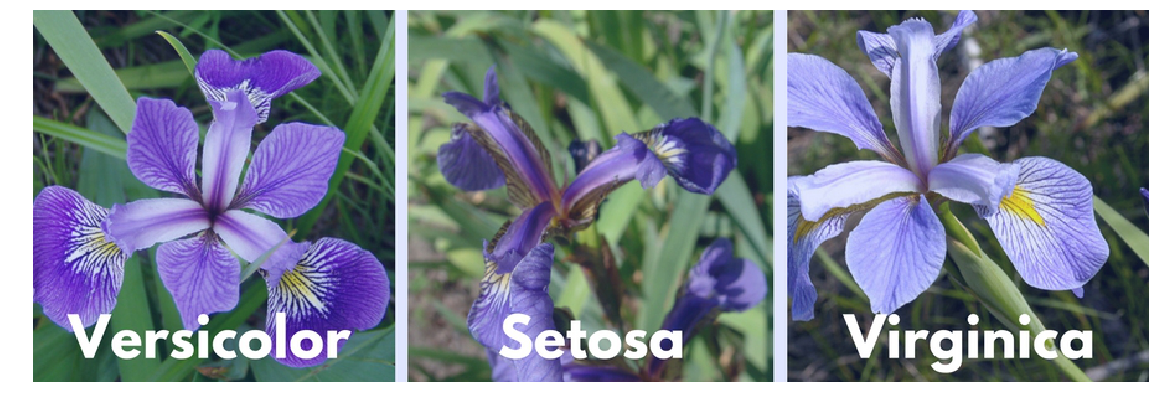

In [16]:
%matplotlib inline
img=mpimg.imread('iris_types.jpg')
plt.figure(figsize=(20,40))
plt.axis('off')
plt.imshow(img)

In [17]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [19]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [21]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [22]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa']], dtype=object)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [24]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            


Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.933333333333
